In [138]:
from optibook.synchronous_client import Exchange
import time
import matplotlib.pyplot as plt


import logging
logger = logging.getLogger('client')
logger.setLevel('ERROR')

print("Setup was successful.")

%matplotlib inline

2021-01-23 14:07:14,368 [matplotlib.pyplot] [MainThread  ] Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Setup was successful.


In [29]:
philips_a = 'PHILIPS_A'
philips_b = 'PHILIPS_B'

    100% |################################| 11.6MB 119kB/s eta 0:00:01
    100% |################################| 1.1MB 1.2MB/s eta 0:00:01
    100% |################################| 2.2MB 642kB/s eta 0:00:01
You are using pip version 9.0.3, however version 20.3.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [100]:
e = Exchange()
a = e.connect()

2021-01-23 13:56:59,837 [asyncio   ] [MainThread  ] Using selector: EpollSelector


In [31]:
# Returns all current positions with cash invested
def my_position():
    positions = e.get_positions_and_cash()
    for p in positions:
        print(p, positions[p])

In [32]:
# See all your outstanding orders
outstanding = e.get_outstanding_orders(philips_a)
for o in outstanding.values():
    print(f"Outstanding order: order_id({o.order_id}), instrument_id({o.instrument_id}), price({o.price}), volume({o.volume}), side({o.side})")

Order Id: 169897


In [124]:
# Returns all public tradeticks since the last time this function was called
tradeticks = e.poll_new_trade_ticks(philips_a)
for t in tradeticks:
    print(f"[{t.instrument_id}] price({t.price}), volume({t.volume}), aggressor_side({t.aggressor_side}), buyer({t.buyer}), seller({t.seller})")

In [57]:



#print(book.bids)
#print(book.asks)

while True:
    time.sleep(3)
    book = e.get_last_price_book(philips_a)
    print('bid : %s'%book.bids[0].price)
    print('ask : %s'%book.asks[0].price)
    best_bid = book.bids[0].price
    best_ask = book.bids[0].price
    buying_trade = e.insert_order(philips_a, price=best_bid, volume=50, side='bid', order_type='limit')
    time.sleep(2)
    book = e.get_last_price_book(philips_a)
    best_ask = book.bids[0].price
    selling_trade = e.insert_order(philips_a, price=best_ask-0.1, volume=50, side='ask', order_type='limit')
    


bid : 66.5
ask : 67.0
bid : 66.5
ask : 66.8
bid : 66.5
ask : 68.10000000000001
bid : 66.5
ask : 67.0
bid : 66.5
ask : 66.7
bid : 66.10000000000001
ask : 68.10000000000001
bid : 66.10000000000001
ask : 66.60000000000001
bid : 66.10000000000001
ask : 66.4
bid : 66.10000000000001
ask : 66.5
bid : 66.10000000000001
ask : 66.60000000000001
bid : 66.10000000000001
ask : 66.5
bid : 66.10000000000001
ask : 66.5


KeyboardInterrupt: 

In [125]:
book = e.get_last_price_book(philips_a)
print('bid : %s'%book.bids[0].price)
print('ask : %s'%book.asks[0].price)
best_bid = book.bids[0].price
best_ask = book.bids[0].price 

bid : 65.9
ask : 66.4


In [61]:
buying_trade = e.insert_order(philips_a, price=best_ask+4, volume=97, side='ask', order_type='limit')

In [53]:
print(buying_trade)

173320


In [152]:
def cross_market_trade(vol):

    book_a = e.get_last_price_book(philips_a)
    book_b = e.get_last_price_book(philips_b)

    #print('bid_a : %s'%book_a.bids[0].price)
    #print('bid_b : %s'%book_b.bids[0].price)
    best_bid_a = book_a.bids[0].price
    best_bid_b = book_b.bids[0].price 

    #print('ask_a : %s'%book_a.asks[0].price)
    #print('ask_b : %s'%book_b.asks[0].price)


    if best_bid_a<best_bid_b:
        bid_volume = book_a.bids[0].volume
        print('Buying from A at %s'%(best_bid_a))
        book_a = e.get_last_price_book(philips_a)
        book_b = e.get_last_price_book(philips_b)
        best_ask_a = book_a.asks[0].price
        best_ask_b = book_b.asks[0].price
        
        
        
        if best_ask_b>best_ask_a:
            volume = min(book_b.asks[0].volume, bid_volume)
            if volume <1:
                volume=2
            buying_trade = e.insert_order(philips_a, price=best_bid_a+0.1, volume=int(volume/2), side='bid', order_type='limit')
            selling_trade = e.insert_order(philips_b, price=best_ask_b-0.1, volume=int(volume/2), side='ask', order_type='limit')
            print("Selling %s to B at %s"%(volume,str(best_ask_b-0.1)))
        else:
            volume = min(book_a.asks[0].volume, bid_volume)
            if volume <1:
                volume=2
            buying_trade = e.insert_order(philips_a, price=best_bid_a+0.1, volume=int(volume/2), side='bid', order_type='limit')
            selling_trade = e.insert_order(philips_a, price=best_ask_a-0.1, volume=int(volume/2), side='ask', order_type='limit')
            print("Selling %s to A at %s"%(volume,str(best_ask_a-0.1)))

    elif best_bid_a>best_bid_b:
        bid_volume = book_b.bids[0].volume
        print('Buying from B at %s'%(best_bid_b))
        book_a = e.get_last_price_book(philips_a)
        book_b = e.get_last_price_book(philips_b)
        best_ask_a = book_a.asks[0].price
        best_ask_b = book_b.asks[0].price
        if best_ask_b>best_ask_a:
            volume = min(book_b.asks[0].volume, bid_volume)
            if volume <1:
                volume=2
            buying_trade = e.insert_order(philips_a, price=best_bid_b+0.1, volume=int(volume/2), side='bid', order_type='limit')
            selling_trade = e.insert_order(philips_b, price=best_ask_b-0.1, volume=int(volume/2), side='ask', order_type='limit')
            print("Selling %s to B at %s"%(volume,str(best_ask_b-0.1)))
        else:
            volume = min(book_a.asks[0].volume, bid_volume)
            if volume <1:
                volume=2
            buying_trade = e.insert_order(philips_b, price=best_bid_a+0.1, volume=int(volume/2), side='bid', order_type='limit')
            selling_trade = e.insert_order(philips_a, price=best_ask_a-0.1, volume=int(volume/2), side='ask', order_type='limit')
            print("Selling %s to A at %s"%(volume,str(best_ask_a-0.1)))

In [139]:
def strategy():
    starting_pnl = e.get_pnl()
    pnls = []
    times = []
    timer = 0
    while timer<120:
        cross_market_trade(3)
        pnls.append(e.get_pnl())
        time.sleep(10)
        times.append(timer)
        timer += 5
    ending_pnl = e.get_pnl()
    print('Started at %s - Ended at %s'%(str(starting_pnl), str(ending_pnl)))
    plt.figure()
    plt.plot(times, pnls)
    plt.show()
        

Buying from B at 73.0
Selling 40 to A at 73.9
Buying from A at 73.10000000000001
Selling 200 to A at 73.60000000000001
Buying from A at 73.2
Selling 100 to A at 73.50000000000001
Buying from A at 72.4
Selling 20 to B at 73.30000000000001
Buying from A at 72.5
Selling 10 to B at 73.2
Buying from A at 72.0
Selling 65 to B at 73.10000000000001
Buying from A at 72.10000000000001
Selling 32 to B at 73.00000000000001
Buying from A at 72.2
Selling 40 to B at 72.80000000000001
Buying from A at 72.3
Selling 20 to A at 72.7
Buying from A at 72.4
Selling 10 to B at 72.60000000000001
Buying from B at 72.3
Selling 20 to A at 72.60000000000001
Buying from A at 72.10000000000001
Selling 32 to B at 72.60000000000001
Buying from A at 72.10000000000001
Selling 16 to B at 72.50000000000001
Buying from A at 71.60000000000001
Selling 8 to B at 72.4
Buying from A at 71.9
Selling 8 to B at 72.4
Buying from A at 72.0
Selling 4 to B at 72.4
Buying from A at 72.10000000000001
Selling 2 to B at 72.50000000000001

2021-01-23 14:09:57,526 [matplotlib.font_manager] [MainThread  ] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-01-23 14:09:57,527 [matplotlib.font_manager] [MainThread  ] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2021-01-23 14:09:57,529 [matplotlib.font_manager] [MainThread  ] findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2021-01-23 14:09:57,530 [matplotlib.font_manager] [MainThread  ] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
2021-01-23 14:09:57,531 [matplotlib.font_manager] [MainThread  ] findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
2021-01-23 14:09:57,532 [matplotlib.font_manager] [MainThread  ] findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
2021-01

Started at -92.00000000000523 - Ended at -240.5000000000049


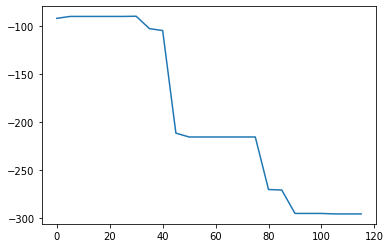

In [140]:
strategy()

In [128]:
def buy_back_stocks():
    positions = e.get_positions_and_cash()
    for p in positions:
        print(p, positions[p])
        if positions[p]['volume']<0:
            book = e.get_last_price_book(p)
            best_bid = book.bids[0].price
            buying_trade = e.insert_order(p, price=best_bid+0.2, volume=-positions[p]['volume'], side='bid', order_type='limit')
            
def sell_back_stocks():
    positions = e.get_positions_and_cash()
    for p in positions:
        print(p, positions[p])
        if positions[p]['volume']>0:
            book = e.get_last_price_book(p)
            print(book.asks)
            best_ask = book.asks[0].price
            selling_trade = e.insert_order(p, price=best_ask-0.2, volume=positions[p]['volume'], side='ask', order_type='limit')   
            print(selling_trade)

def delete_order(instrument):
    # Delete all outstanding orders
    outstanding = e.get_outstanding_orders(instrument)
    for o in outstanding.values():
        result = e.delete_order(instrument, order_id=o.order_id)
        print(f"Deleted order id {o.order_id}: {result}")

In [154]:
buy_back_stocks()
sell_back_stocks()


PHILIPS_A {'volume': 4, 'cash': -769.8000000000047}
PHILIPS_B {'volume': 0, 'cash': 80.10000000000014}
PHILIPS_A {'volume': 4, 'cash': -769.8000000000047}
[[price_volume] price=70.2, volume=200, [price_volume] price=72.0, volume=4, [price_volume] price=73.5, volume=1, [price_volume] price=100.0, volume=1, [price_volume] price=300.0, volume=1]
197143
PHILIPS_B {'volume': 0, 'cash': 80.10000000000014}


In [149]:
delete_order(philips_a)
delete_order(philips_b)

Deleted order id 196014: True
Deleted order id 196054: True
Deleted order id 196070: True
Deleted order id 196213: True
Deleted order id 196260: True
Deleted order id 196376: True
Deleted order id 196131: True
Deleted order id 196149: True
Deleted order id 196163: True
Deleted order id 196178: True
Deleted order id 196277: True


In [155]:
my_position()

PHILIPS_A {'volume': 0, 'cash': -489.80000000000473}
PHILIPS_B {'volume': 0, 'cash': 80.10000000000014}
